In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("SPvsCompound.csv")
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Average of Compound
0,0,2017-10-10,2549.989990,2555.229980,2544.860107,2550.639893,2960500000,0.018745
1,1,2017-10-11,2550.620117,2555.239990,2547.949951,2555.239990,2976090000,0.115667
2,2,2017-10-12,2552.879883,2555.330078,2548.310059,2550.929932,3151510000,0.177133
3,3,2017-10-13,2555.659912,2557.649902,2552.090088,2553.169922,3149440000,0.017685
4,4,2017-10-16,2555.570068,2559.469971,2552.639893,2557.639893,2916020000,0.284189


In [3]:
df.describe()

,Unnamed: 0,Open,High,Low,Close,Volume,Average of Compound
count,44.000000,44.000000,44.000000,44.000000,44.000000,4.400000e+01,44.000000
mean,21.500000,2608.661127,2614.607483,2603.720675,2609.593195,3.271721e+09,0.238976
std,12.845233,50.917946,51.524063,50.828022,50.076926,7.165225e+08,0.311872
min,0.000000,2549.989990,2555.229980,2544.000000,2550.639893,1.349780e+09,-0.927200
25%,10.750000,2568.384949,2572.675049,2563.197571,2564.890014,2.987055e+09,0.030445
50%,21.500000,2581.559936,2588.875000,2577.930054,2585.239991,3.306435e+09,0.284651
75%,32.250000,2662.765014,2670.259949,2659.299927,2663.165100,3.556482e+09,0.405992
max,43.000000,2692.709961,2694.969971,2685.919922,2690.159912,5.723920e+09,0.841150


In [4]:
# Narrowing data using the standard deviation
df = df.loc[(df['Close'] > 2509) & (df['Close'] < 2709)]

In [5]:
# Convert compound sentiment range max being 1 and min being -1 into percentage. i.e -1 = 0% and 1 =100%
#((input - min) * 100) / (max - min)
max=1
min =-1
for index, row in df.iterrows():
    d= ((row['Average of Compound'] - min) * 100) / (max - min)
    df.loc[index, 'Average of Compound'] = d
df.head()

# Convert compound sentiment range max being 1 and min being -1 into percentage. i.e -1 = 0% and 1 =100%
#((input - min) * 100) / (max - min)
max=2690
min =2550
for index, row in df.iterrows():
    d= ((row['Close'] - min)*1000) / (max - min)
    df.loc[index, 'Close'] = d
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Average of Compound
0,0,2017-10-10,2549.989990,2555.229980,2544.860107,4.570664,2960500000,50.937273
1,1,2017-10-11,2550.620117,2555.239990,2547.949951,37.428500,2976090000,55.783333
2,2,2017-10-12,2552.879883,2555.330078,2548.310059,6.642371,3151510000,58.856667
3,3,2017-10-13,2555.659912,2557.649902,2552.090088,22.642300,3149440000,50.884231
4,4,2017-10-16,2555.570068,2559.469971,2552.639893,54.570664,2916020000,64.209444


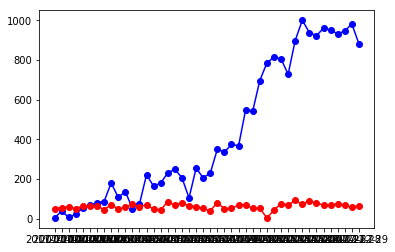

In [7]:
# Each point on the sine chart is marked by a blue circle
stock_plot = plt.plot(df['Date'], df['Close'], marker ='o', color='blue', label="Sine")

compound_plot = plt.plot(df['Date'], df['Average of Compound'], marker ='o', color='red', label="Sine")
plt.show()